# Package Loading

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
pd.set_option('mode.chained_assignment', None)

In [44]:
%matplotlib inline

In [45]:
plt.style.use('fivethirtyeight')

# Data Reading

In [46]:
ks = pd.read_csv("ks-projects-201801.csv")

# First Overview

In [47]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Drop Repeated Columns

In [48]:
ks_selected = ks.drop(['usd pledged', 'pledged','goal'], axis = 1)

In [49]:
ks_selected.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


# Drop Columns Where Numbers Do Not Add Up

In [50]:
to_drop_success = ks_selected[((ks_selected['state'] == "successful") & ((ks_selected['usd_pledged_real'] - ks_selected['usd_goal_real']) <0))]['ID']

In [51]:
to_drop_fail = ks_selected[((ks_selected['state'] == "failed") & ((ks_selected['usd_pledged_real'] - ks_selected['usd_goal_real']) >=0))]['ID']

In [52]:
def to_keep(a):
    if a in to_drop_success.values or a in to_drop_fail.values:
        return False
    return True

In [53]:
vec_to_keep = np.vectorize(to_keep)

In [54]:
ks_selected2 = ks_selected[vec_to_keep(ks_selected['ID'])]

In [55]:
ks_selected2.count()

ID                  378650
name                378646
category            378650
main_category       378650
currency            378650
deadline            378650
launched            378650
state               378650
backers             378650
country             378650
usd_pledged_real    378650
usd_goal_real       378650
dtype: int64

# Drop rows with NA Values

In [56]:
ks_selected2[ks_selected2['name'].isna().values]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,2012-01-01 12:35:31,failed,1,US,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2012-12-19 23:57:48,failed,12,GB,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2016-06-18 05:01:47,suspended,0,US,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,2011-11-06 23:55:55,failed,5,US,220.00,35000.00


In [57]:
ks_selected3 = ks_selected2.dropna()

In [58]:
ks_selected3.sort_values('deadline').head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,2009-04-24 21:52:03,successful,3,US,35.0,20.0
213711,2089078683,New York Makes a Book!!,Journalism,Journalism,USD,2009-05-16,2009-04-28 13:55:41,successful,110,US,3329.0,3000.0
342226,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Rock,Music,USD,2009-05-16,2009-04-29 05:26:32,failed,2,US,15.0,300.0
28960,1147015301,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,USD,2009-05-20,2009-04-30 22:10:30,failed,4,US,40.0,300.0
196244,199916122,Mr. Squiggles,Illustration,Art,USD,2009-05-22,2009-05-12 23:39:58,failed,0,US,0.0,30.0


# Rename Ambigious Values

In [59]:
ks_selected3.loc[ks_selected3['country'] == 'N,0"','country'] = 'NA'

# Feature Engineering

In [60]:
def as_date(z):
    return datetime.strptime(z, '%Y-%m-%d')

In [61]:
vect_as_date = np.vectorize(as_date)

In [62]:
def as_date_time(z):
    return datetime.strptime(z, '%Y-%m-%d %H:%M:%S')

In [63]:
vect_as_date_time = np.vectorize(as_date_time)

In [64]:
ks_selected3.loc[:,'launched'] = vect_as_date_time(ks_selected3['launched'])

In [67]:
ks_selected3.loc[:,'deadline'] = vect_as_date(ks_selected3['deadline'])

In [68]:
ks_selected3.loc[:,'camp_length'] = ks_selected3['deadline'] - ks_selected3['launched']

In [69]:
ks_selected3.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,camp_length
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,29 days 20:35:49
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00,55 days 15:24:57


In [70]:
ks_selected3['laun_year'] = pd.DatetimeIndex(ks_selected3['launched']).year
ks_selected3['laun_month'] = pd.DatetimeIndex(ks_selected3['launched']).month

In [71]:
ks_selected3.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,camp_length,laun_year,laun_month
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58 days 11:47:32,2015,8
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,59 days 19:16:03,2017,9
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44 days 23:39:10,2013,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,29 days 20:35:49,2012,3
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00,55 days 15:24:57,2015,7


In [72]:
ks_selected3 = ks_selected3.drop(['launched', 'deadline'], axis = 1)

In [73]:
ks_selected3 = ks_selected3.reset_index()

In [74]:
def filter_day(a):
    lis = []
    for i in range(len(a)):
        lis.append(a[i])
    return lis

In [75]:
lis = []
for i in range(len(ks_selected3['camp_length'])):
    lis.append(ks_selected3['camp_length'][i].days)

In [76]:
ks_selected3['camp_length'] = lis

In [77]:
ks_selected3.sort_values('laun_year')

,index,ID,name,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,camp_length,laun_year,laun_month
94576,94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,canceled,0,US,0.00,4000.00,14760,1970,1
48146,48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,canceled,0,US,0.00,15000.00,14834,1970,1
247905,247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,canceled,0,US,0.00,10000.00,14732,1970,1
75394,75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,canceled,0,US,0.00,700.00,14749,1970,1
2842,2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,canceled,0,US,0.00,5000.00,14866,1970,1
318990,319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,suspended,0,CH,0.00,1905.97,16738,1970,1
273771,273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,canceled,0,US,0.00,500.00,14708,1970,1
253086,253094,357138373,Tyler Herrin wants YOU (and needs you) for his...,Electronic Music,Music,USD,successful,81,US,5270.00,4000.00,89,2009,8
71261,71263,1362852844,The Ethical Butcher's The Bacon Gospel : BCN/P...,Food,Food,USD,successful,44,US,1991.00,1950.00,86,2009,10
161288,161293,1820414655,Mass Produce the Bison Oleander Time Machine,Hardware,Technology,USD,failed,5,US,1026.00,25000.00,42,2009,12


In [78]:
ks_selected3 = ks_selected3[ks_selected3['laun_year']>= 2009]

In [79]:
ks_selected3.sort_values('laun_year')

,index,ID,name,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,camp_length,laun_year,laun_month
273201,273209,459929444,The Virgin Whore Chronicles Are Close to Becom...,Indie Rock,Music,USD,failed,2,US,20.00,2000.00,88,2009,10
89768,89771,1456069664,WE'RE BUILDING A CABIN!!!,Product Design,Design,USD,successful,108,US,10140.00,10000.00,81,2009,11
135609,135612,1688524873,"HEAVEN, the novel (& the CD that goes with it)",Fiction,Publishing,USD,failed,16,US,1180.00,10000.00,60,2009,9
284647,284656,518209887,The Umoja Arts Project,Sculpture,Art,USD,successful,14,US,642.61,500.00,84,2009,9
321907,321919,709346041,The Mad Hatter-A Bizarre Thriller,Narrative Film,Film & Video,USD,failed,4,US,400.00,7000.00,89,2009,11
165766,165771,1843433417,The Jason Scott Sabbatical,Documentary,Film & Video,USD,successful,342,US,26658.42,25000.00,31,2009,10
364953,364968,929472249,Get in the pool! with FAT GIRLS FLOAT,Documentary,Film & Video,USD,successful,93,US,6559.59,5000.00,82,2009,9
249065,249073,33686166,Empower Women in Rwanda through Social Enterprise,Art,Art,USD,successful,25,US,650.00,600.00,52,2009,6
305252,305262,624560862,"Two Original Musical Tracks and Music Videos, ...",Indie Rock,Music,USD,canceled,54,US,3370.00,5000.00,60,2009,11
139058,139062,1706397343,We Fly to Philly / Release new album / Tour we...,Rock,Music,USD,successful,15,US,519.00,500.00,56,2009,11


# Final Data View

In [80]:
ks_selected3.head()

,index,ID,name,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,camp_length,laun_year,laun_month
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,failed,0,GB,0.0,1533.95,58,2015,8
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,failed,15,US,2421.0,30000.00,59,2017,9
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,failed,3,US,220.0,45000.00,44,2013,1
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,failed,1,US,1.0,5000.00,29,2012,3
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,canceled,14,US,1283.0,19500.00,55,2015,7


In [81]:
ks_selected3.to_csv("data_david_eduardo_cleaned.csv")

# Basic Visualization

In [82]:
group1 = ks_selected3.pivot_table(values = 'ID',index = ['main_category'], aggfunc = np.count_nonzero)
group1 = group1.reset_index()

Text(0,0.5,'counts')

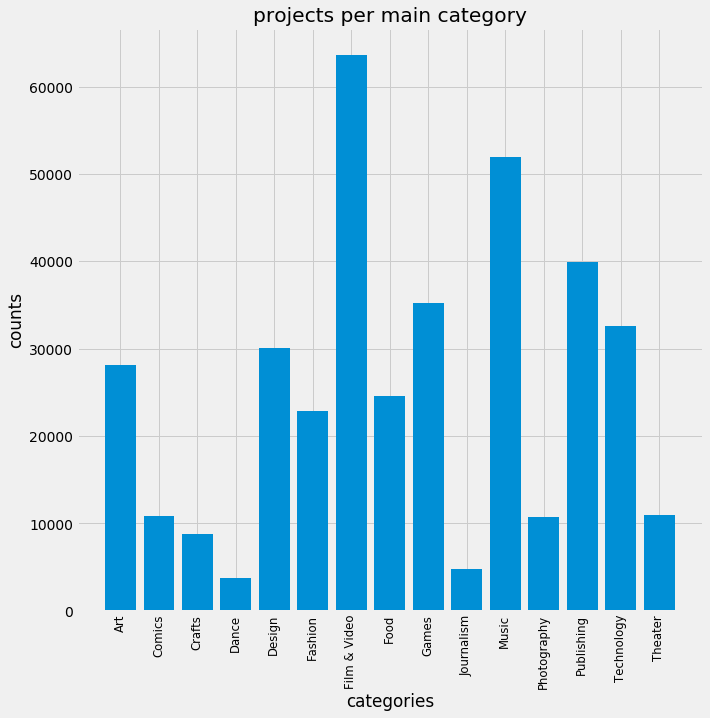

In [83]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(1, 1, 1)
plt.xticks(rotation = 'vertical', size= 'small')
plt.bar(x = group1['main_category'], height = group1['ID'])
plt.title('projects per main category')
plt.xlabel('categories')
plt.ylabel('counts')

In [84]:
group2 = ks_selected3.pivot_table(values = 'ID',index = ['country'], aggfunc = np.count_nonzero)
group2 = group2.reset_index()

Text(0,0.5,'counts')

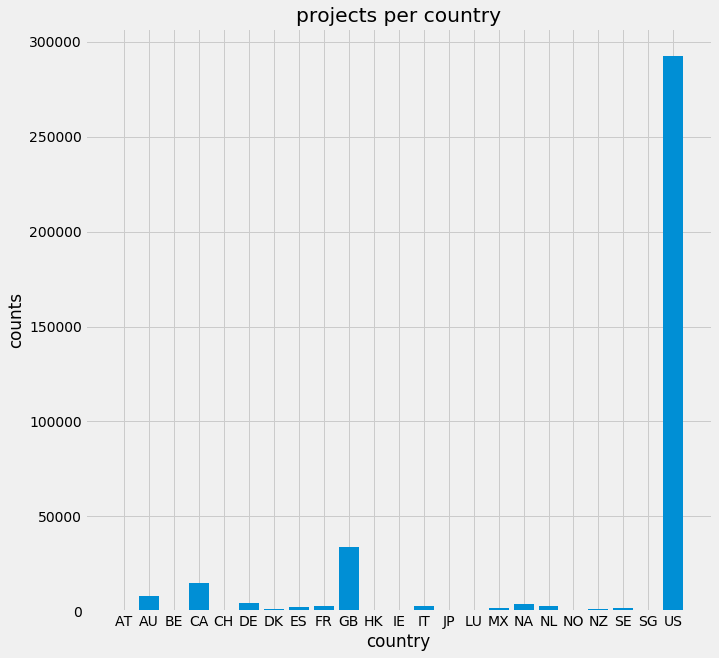

In [85]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(1, 1, 1)
plt.bar(x = group2['country'], height = group2['ID'], )
plt.title('projects per country')
plt.xlabel('country')
plt.ylabel('counts')

Text(0,0.5,'counts')

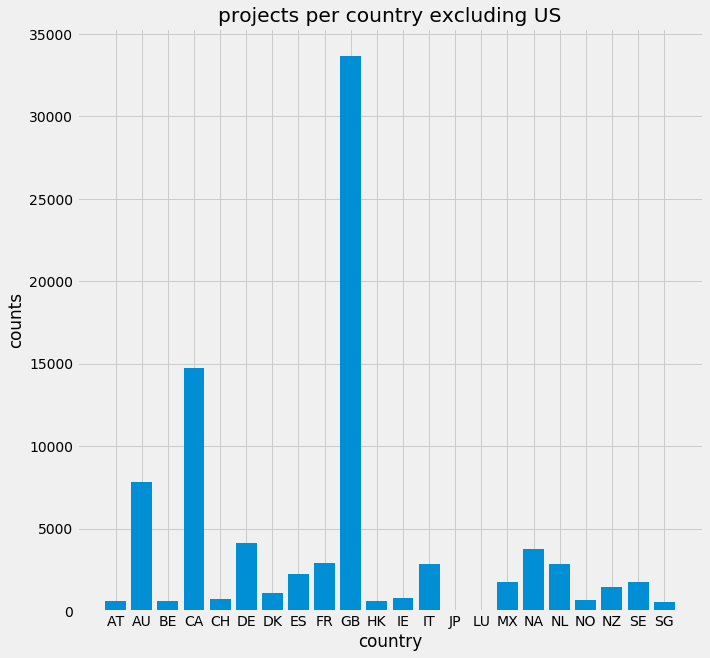

In [86]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(1, 1, 1)
plt.bar(x = group2[group2['country']!='US']['country'], height = group2[group2['country']!='US']['ID'], )
plt.title('projects per country excluding US')
plt.xlabel('country')
plt.ylabel('counts')

In [87]:
group3 = ks_selected3.pivot_table(values = 'ID',index = ['state'], aggfunc = np.count_nonzero)
group3 = group3.reset_index()

Text(0,0.5,'counts')

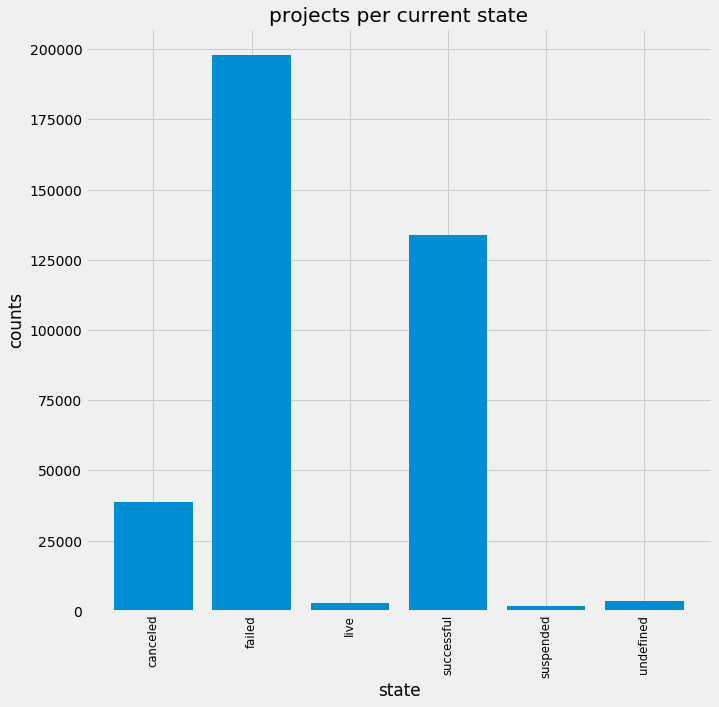

In [88]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(1, 1, 1)
plt.xticks(rotation = 'vertical', size= 'small')
plt.bar(x = group3['state'], height = group3['ID'])
plt.title('projects per current state')
plt.xlabel('state')
plt.ylabel('counts')

In [89]:
group4 = ks_selected3.pivot_table(values = 'ID',index = ['currency'], aggfunc = np.count_nonzero)
group4 = group4.reset_index()

Text(0,0.5,'counts')

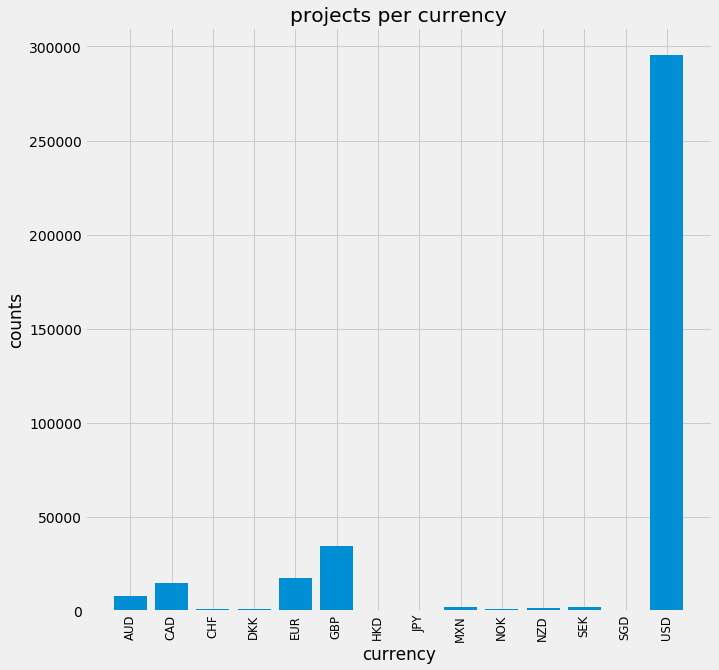

In [90]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(1, 1, 1)
plt.xticks(rotation = 'vertical', size= 'small')
plt.bar(x = group4['currency'], height = group4['ID'])
plt.title('projects per currency')
plt.xlabel('currency')
plt.ylabel('counts')

In [91]:
group5 = ks_selected3.pivot_table(values = 'ID',index = ['laun_year'], aggfunc = np.count_nonzero)
group5 = group5.reset_index()

Text(0,0.5,'counts')

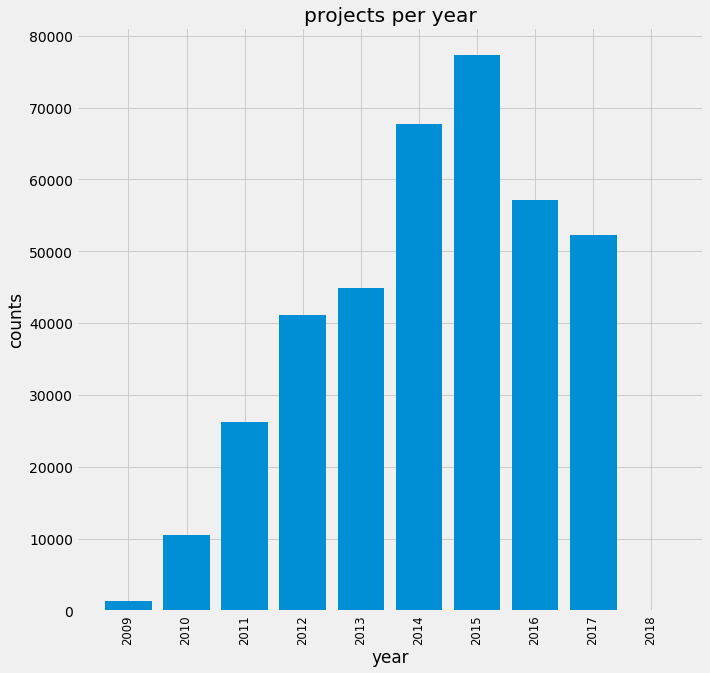

In [92]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(1, 1, 1)
plt.xticks(np.arange(min(group5['laun_year']), max(group5['laun_year']+1), 1.0))
plt.xticks(rotation = 'vertical', size= 'small')
plt.bar(x = group5['laun_year'], height = group5['ID'])
plt.title('projects per year')
plt.xlabel('year')
plt.ylabel('counts')

In [93]:
group6 = ks_selected3.pivot_table(values = 'ID',index = ['laun_month'], aggfunc = np.count_nonzero)
group6 = group6.reset_index()

Text(0,0.5,'counts')

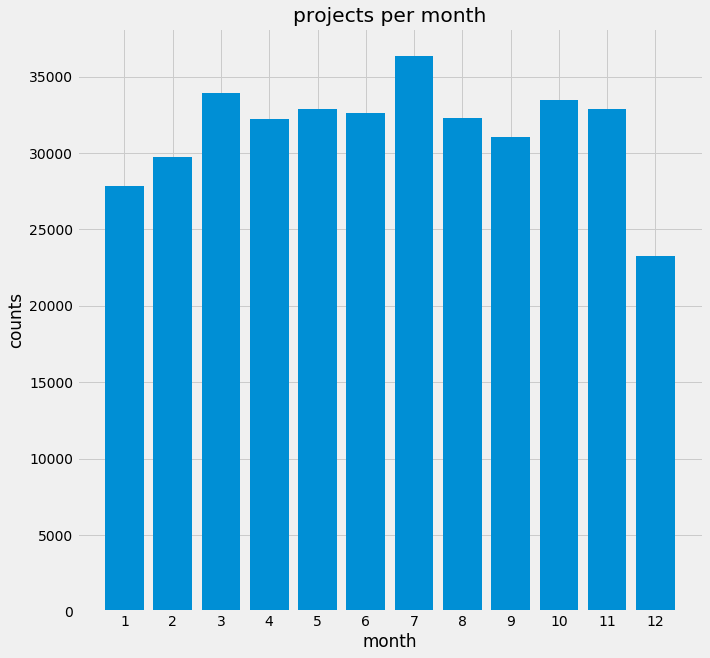

In [94]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(1, 1, 1)
plt.xticks(np.arange(min(group6['laun_month']), max(group6['laun_month']+1), 1.0))
plt.bar(x = group6['laun_month'], height = group6['ID'])
plt.title('projects per month')
plt.xlabel('month')
plt.ylabel('counts')

## Hypothesis 1 - Data Exploration

In [95]:
comp1 = ks_selected3.pivot_table(values = 'ID',index = ['laun_year'], columns = ['state'], aggfunc = np.count_nonzero)
comp1 = comp1.reset_index()

In [96]:
comp1

state,laun_year,canceled,failed,live,successful,suspended,undefined
0,2009,150.0,600.0,NaN,579.0,NaN,NaN
1,2010,926.0,4982.0,NaN,4591.0,16.0,NaN
2,2011,2144.0,11875.0,NaN,12171.0,44.0,NaN
3,2012,2631.0,20586.0,NaN,17891.0,52.0,2.0
4,2013,3690.0,21684.0,NaN,19415.0,58.0,2.0
5,2014,7418.0,38199.0,NaN,21107.0,270.0,751.0
6,2015,8927.0,44301.0,NaN,20970.0,721.0,2380.0
7,2016,7119.0,30526.0,2.0,18765.0,343.0,427.0
8,2017,5766.0,24957.0,2675.0,18462.0,340.0,NaN
9,2018,2.0,NaN,122.0,NaN,NaN,NaN


In [97]:
comp1[comp1.isna()] = 0

In [98]:
comp1

state,laun_year,canceled,failed,live,successful,suspended,undefined
0,2009,150.0,600.0,0.0,579.0,0.0,0.0
1,2010,926.0,4982.0,0.0,4591.0,16.0,0.0
2,2011,2144.0,11875.0,0.0,12171.0,44.0,0.0
3,2012,2631.0,20586.0,0.0,17891.0,52.0,2.0
4,2013,3690.0,21684.0,0.0,19415.0,58.0,2.0
5,2014,7418.0,38199.0,0.0,21107.0,270.0,751.0
6,2015,8927.0,44301.0,0.0,20970.0,721.0,2380.0
7,2016,7119.0,30526.0,2.0,18765.0,343.0,427.0
8,2017,5766.0,24957.0,2675.0,18462.0,340.0,0.0
9,2018,2.0,0.0,122.0,0.0,0.0,0.0


In [99]:
comp1['total'] = group5['ID']

In [100]:
comp1['success_rate'] = comp1['successful']/comp1['total']

In [101]:
comp1

state,laun_year,canceled,failed,live,successful,suspended,undefined,total,success_rate
0,2009,150.0,600.0,0.0,579.0,0.0,0.0,1329,0.435666
1,2010,926.0,4982.0,0.0,4591.0,16.0,0.0,10515,0.436614
2,2011,2144.0,11875.0,0.0,12171.0,44.0,0.0,26234,0.463940
3,2012,2631.0,20586.0,0.0,17891.0,52.0,2.0,41162,0.434648
4,2013,3690.0,21684.0,0.0,19415.0,58.0,2.0,44849,0.432897
5,2014,7418.0,38199.0,0.0,21107.0,270.0,751.0,67745,0.311565
6,2015,8927.0,44301.0,0.0,20970.0,721.0,2380.0,77299,0.271284
7,2016,7119.0,30526.0,2.0,18765.0,343.0,427.0,57182,0.328163
8,2017,5766.0,24957.0,2675.0,18462.0,340.0,0.0,52200,0.353678
9,2018,2.0,0.0,122.0,0.0,0.0,0.0,124,0.000000


In [102]:
observed_stat = comp1[comp1['laun_year'] == 2015]['success_rate']

In [103]:
observed_stat

6    0.271284
Name: success_rate, dtype: float64

## Rationale: The 2015 success rate is oddly low

# First Hypothesis

## Null Hypothesis: 2015 has a horrible success rate by chance
## Alternative Hypothesis: 2015 has a horrible success rate because something happened

In [104]:
number_of_project_2015 = np.sum(ks_selected3['laun_year'] == 2015)

In [105]:
number_of_project_2015

77299

In [106]:
state = ks_selected3['state']

In [107]:
year_real = ks_selected3['laun_year']

In [108]:
rand_year = year_real.sample(len(year_real), replace = False)

In [109]:
rand_year = rand_year.reset_index()

In [110]:
permuted_success = pd.DataFrame({'state': state, 
                                'year': year_real, 
                                'shuffled_year' : rand_year['laun_year']})

In [111]:
rand_comp = permuted_success.pivot_table(values = 'year',index = ['shuffled_year'], columns = ['state'], aggfunc = np.count_nonzero)
rand_comp = rand_comp.reset_index()

In [112]:
rand_total = permuted_success.pivot_table(values = 'year',index = ['shuffled_year'], aggfunc = np.count_nonzero)
rand_total = rand_total.reset_index()

In [113]:
rand_comp['total'] = rand_total['year']

In [114]:
rand_comp['success_rate'] = rand_comp['successful']/rand_comp['total']

In [115]:
rand_comp

state,shuffled_year,canceled,failed,live,successful,suspended,undefined,total,success_rate
0,2009.0,145.0,682.0,12.0,465.0,8.0,17.0,1329.0,0.349887
1,2010.0,1049.0,5487.0,74.0,3743.0,57.0,105.0,10515.0,0.355968
2,2011.0,2687.0,13731.0,218.0,9234.0,132.0,232.0,26234.0,0.351986
3,2012.0,4310.0,21403.0,335.0,14511.0,204.0,397.0,41162.0,0.352534
4,2013.0,4654.0,23263.0,323.0,15968.0,206.0,433.0,44849.0,0.356039
5,2014.0,6867.0,35252.0,486.0,24232.0,297.0,611.0,67745.0,0.357694
6,2015.0,7817.0,40472.0,535.0,27319.0,425.0,731.0,77299.0,0.353420
7,2016.0,5904.0,29891.0,410.0,20162.0,277.0,535.0,57182.0,0.352593
8,2017.0,5319.0,27461.0,405.0,18278.0,237.0,500.0,52200.0,0.350153
9,2018.0,19.0,63.0,1.0,39.0,1.0,1.0,124.0,0.314516


In [116]:
permuted_stat = rand_comp[rand_comp['shuffled_year'] == 2015]['success_rate']

In [117]:
permuted_stat

6    0.35342
Name: success_rate, dtype: float64

In [118]:
success_rate = []
repetitions = 1000
for i in np.arange(repetitions):
    rand_year = year_real.sample(len(year_real), replace = False)
    rand_year = rand_year.reset_index()
    permuted_success = pd.DataFrame({'state': state, 
                                'year': year_real, 
                                'shuffled_year' : rand_year['laun_year']})
    rand_comp = permuted_success.pivot_table(values = 'year',index = ['shuffled_year'], columns = ['state'], aggfunc = np.count_nonzero)
    rand_comp = rand_comp.reset_index()
    rand_total = permuted_success.pivot_table(values = 'year',index = ['shuffled_year'], aggfunc = np.count_nonzero)
    rand_total = rand_total.reset_index()
    rand_comp['total'] = rand_total['year']
    rand_comp['success_rate'] = rand_comp['successful']/rand_comp['total']
    permuted_stat = rand_comp[rand_comp['shuffled_year'] == 2015]['success_rate']
    success_rate.append(permuted_stat.values)

In [119]:
success_rate = np.array(success_rate)

Text(0,0.5,'counts')

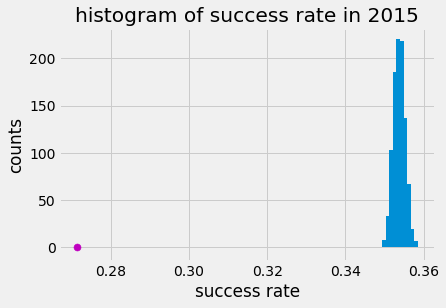

In [120]:
plt.hist(success_rate)
plt.scatter(observed_stat, 0, s = 50, color = 'm')
plt.title('histogram of success rate in 2015')
plt.xlabel('success rate')
plt.ylabel('counts')

In [121]:
p_value = np.sum(np.array(success_rate) <= observed_stat.values)/1000

In [122]:
p_value

0.0

P value is 0, therefore we can certainly conclude that something significant happened in 2015 that triggered the change

In [123]:
data2015 = ks_selected3[ks_selected3['laun_year']==2015].pivot_table(values = 'ID',index = ['main_category'], 
                                                                     columns = ['state'], aggfunc = np.count_nonzero)
data2015 = data2015.reset_index()

In [124]:
group2015 = ks_selected3[ks_selected3['laun_year']==2015].pivot_table(values = 'ID',index = ['main_category'], aggfunc = np.count_nonzero)
group2015 = group2015.reset_index()

In [125]:
data2015['total_2015'] = group2015['ID']

In [126]:
data2015['success_rate_2015'] = data2015['successful']/data2015['total_2015']

In [127]:
data2015.loc[data2015['undefined'].isna(),'undefined'] = 0

In [128]:
data2015

state,main_category,canceled,failed,successful,suspended,undefined,total_2015,success_rate_2015
0,Art,507.0,3070.0,1707.0,37.0,0.0,5321,0.320804
1,Comics,166.0,752.0,994.0,10.0,0.0,1922,0.517170
2,Crafts,260.0,1763.0,526.0,38.0,0.0,2587,0.203324
3,Dance,38.0,286.0,293.0,6.0,0.0,623,0.470305
4,Design,927.0,3660.0,2046.0,71.0,1.0,6705,0.305145
5,Fashion,623.0,3509.0,1094.0,50.0,1.0,5277,0.207315
6,Film & Video,1061.0,5591.0,3003.0,40.0,506.0,10201,0.294383
7,Food,598.0,4323.0,1171.0,70.0,0.0,6162,0.190036
8,Games,1444.0,3614.0,2263.0,97.0,0.0,7418,0.305069
9,Journalism,153.0,1042.0,248.0,29.0,0.0,1472,0.168478


In [129]:
comp2 = ks_selected3.pivot_table(values = 'ID',index = ['main_category'], columns = ['state'], aggfunc = np.count_nonzero)
comp2 = comp2.reset_index()

In [130]:
comp2['total'] = group1['ID']

In [131]:
comp2['success_rate_total'] = comp2['successful']/comp2['total']

In [132]:
comp2.loc[comp2['undefined'].isna(),'undefined'] = 0

In [133]:
comp2

state,main_category,canceled,failed,live,successful,suspended,undefined,total,success_rate_total
0,Art,2221.0,14130.0,194.0,11508.0,96.0,0.0,28149,0.408824
1,Comics,842.0,4036.0,76.0,5842.0,23.0,0.0,10819,0.539976
2,Crafts,843.0,5703.0,76.0,2115.0,72.0,0.0,8809,0.240095
3,Dance,163.0,1235.0,18.0,2338.0,13.0,1.0,3768,0.620488
4,Design,4151.0,14813.0,305.0,10549.0,246.0,2.0,30066,0.350861
5,Fashion,2650.0,14182.0,250.0,5593.0,138.0,3.0,22816,0.245135
6,Film & Video,5753.0,32902.0,332.0,23621.0,117.0,854.0,63579,0.371522
7,Food,2211.0,15969.0,184.0,6085.0,153.0,0.0,24602,0.247338
8,Games,6202.0,16002.0,287.0,12518.0,220.0,1.0,35230,0.355322
9,Journalism,523.0,3137.0,31.0,1012.0,52.0,0.0,4755,0.212829


In [134]:
comp_vs = pd.merge(comp2, data2015,on='main_category')[['main_category','success_rate_total','success_rate_2015','total','total_2015']]

In [135]:
comp_vs['percent_of_total'] = comp_vs['total_2015']/comp_vs['total']

In [136]:
comp_vs

state,main_category,success_rate_total,success_rate_2015,total,total_2015,percent_of_total
0,Art,0.408824,0.320804,28149,5321,0.189030
1,Comics,0.539976,0.517170,10819,1922,0.177650
2,Crafts,0.240095,0.203324,8809,2587,0.293677
3,Dance,0.620488,0.470305,3768,623,0.165340
4,Design,0.350861,0.305145,30066,6705,0.223009
5,Fashion,0.245135,0.207315,22816,5277,0.231285
6,Film & Video,0.371522,0.294383,63579,10201,0.160446
7,Food,0.247338,0.190036,24602,6162,0.250467
8,Games,0.355322,0.305069,35230,7418,0.210559
9,Journalism,0.212829,0.168478,4755,1472,0.309569


Interpretation: After examining the 2015 year a little bit further, we could identify a couple of things:
1. there is a decline in success rate in almost all of the categories
2. Areas like music, publishing, and film and video still has a lot of ongoing campaigns similar to previous years. A thing to note is that there seems to have a significant drop in the music category
3. Tech related campaigns really increased in amount this year, contributing to about 1/3 the total tech campaigns in the dataset. It also has the second most campaigns across the board.

Key inferences and possible explanation:
1. There may have been a saturation ofr kickstarter at this point(6th year mark)
2. the increased number of campaigns may have greatly deteriorated the quality of the campaigns
3. The digital age foreseeably triggered a rise in tech related projects in kickstarter. Given that tech projects in kickstarter haven't always been the most favorable one(not really a passion project, less relatable), certainly also contributed to 2015's overall low success rate

## Rationale: The most interesting predictive work we could do on the dataset is to predict how successful a campiagn will be

# Second Hypothesis

## Regression Model predicting how successful the campaign is with respect to the goal

In [137]:
rs_data = ks_selected3

Instead of running a model on the amount pledged or the state of the projects, we think that running the model on the ratio between the actual amount pledged over the goal is the best way to reflect how successful a campaign is. This is because when factored in the goal, it makes the metrics more dynamic, and since we still have a continous output it also makes the target variable more descriptive instead of one dimensional

In [138]:
rs_data['pledged_goal'] = rs_data['usd_pledged_real']/rs_data['usd_goal_real'] * 100

In [139]:
rs_data

,index,ID,name,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,camp_length,laun_year,laun_month,pledged_goal
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,failed,0,GB,0.00,1533.95,58,2015,8,0.000000
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,failed,15,US,2421.00,30000.00,59,2017,9,8.070000
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,failed,3,US,220.00,45000.00,44,2013,1,0.488889
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,failed,1,US,1.00,5000.00,29,2012,3,0.020000
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,canceled,14,US,1283.00,19500.00,55,2015,7,6.579487
5,5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,successful,224,US,52375.00,50000.00,34,2016,2,104.750000
6,6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,successful,16,US,1205.00,1000.00,19,2014,12,120.500000
7,7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,failed,40,US,453.00,25000.00,44,2016,2,1.812000
8,8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,canceled,58,US,8233.00,125000.00,34,2014,4,6.586400
9,9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,canceled,43,US,6240.57,65000.00,29,2014,7,9.600877


The predictor variables are selected based on how they could actually be used to predict the successfulness of the campiagn when it is being launched, this why we didnt include variables like the pledge amount, goal amount and backers because those information are not really available at the moment of prediction.

We also did not include the category variable simply because it has too many layers and would be extremely hard for interpretation. 

All the other variables were included as they all could potentially offer insight to the successfulness of the campaign. We didn't pre screen out some variables through metrics like correlation because we do want to see how these variables play out in the model, and more so we also want to evaluate the different variables within model with a relative significance compared to the other predictors.

In [140]:
model_price = smf.ols(formula = "pledged_goal ~ main_category + laun_year + laun_month + camp_length + country"
                      , data = rs_data).fit()

In [141]:
model_goal = smf.ols(formula = "usd_goal_real ~ main_category + laun_year + laun_month + camp_length + country"
                      , data = rs_data).fit()

In [142]:
model_pledged = smf.ols(formula = "usd_pledged_real ~ main_category + laun_year + laun_month + camp_length + country"
                      , data = rs_data).fit()

In [143]:
model_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pledged_goal   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.618
Date:                Thu, 02 May 2019   Prob (F-statistic):            0.00863
Time:                        23:28:25   Log-Likelihood:            -4.3964e+06
No. Observations:              378639   AIC:                         8.793e+06
Df Residuals:                  378599   BIC:                         8.793e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -2.004e+05   5.09e+04     -3.935      0.000      -3e+05   -1.01e+05
main_category[T.Comics]         330.8943    302.241      1.095      0.274    -261.489     923.278
main_category[T.Crafts]         -81.4064    326.640     -0.249      0.803    -721.611     558.798
main_category[T.Dance]         -159.8031    463.108     -0.345      0.730   -1067.481     747.875
main_category[T.Design]        -110.1691    222.594     -0.495      0.621    -546.446     326.108
main_category[T.Fashion]       -200.5548    238.484     -0.841      0.400    -667.976     266.866
main_category[T.Film & Video]   -66.1150    191.803     -0.345      0.730    -442.044     309.814
main_category[T.Food]          -233.4862    233.455     -1.000      0.317    -691.052     224.079
main_category[T.Games]          456.1428    214.254      2.129      0.033      36.211     876.075
main_category[T.Journalism]    -242.7151    418.783     -0.580      0.562   -1063.517     578.087
main_category[T.Music]          567.9739    199.288      2.850      0.004     177.376     958.572
main_category[T.Photography]   -163.2017    302.507     -0.539      0.590    -756.107     429.703
main_category[T.Publishing]     -87.9185    207.988     -0.423      0.673    -495.569     319.732
main_category[T.Technology]     -28.0614    219.402     -0.128      0.898    -458.082     401.960
main_category[T.Theater]        -91.2979    301.578     -0.303      0.762    -682.382     499.786
country[T.AU]                   154.1009   1133.513      0.136      0.892   -2067.551    2375.753
country[T.BE]                   -42.8827   1532.333     -0.028      0.978   -3046.210    2960.445
country[T.CA]                   340.6407   1114.642      0.306      0.760   -1844.024    2525.305
country[T.CH]                    36.5265   1459.748      0.025      0.980   -2824.537    2897.590
country[T.DE]                    14.8046   1167.982      0.013      0.990   -2274.404    2304.014
country[T.DK]                    72.5371   1354.139      0.054      0.957   -2581.535    2726.609
country[T.ES]                   -35.1626   1227.462     -0.029      0.977   -2440.952    2370.627
country[T.FR]                   118.7179   1198.262      0.099      0.921   -2229.840    2467.276
country[T.GB]                   179.0342   1102.728      0.162      0.871   -1982.279    2340.348
country[T.HK]                    72.8638   1532.334      0.048      0.962   -2930.466    3076.194
country[T.IE]                    47.6745   1439.486      0.033      0.974   -2773.674    2869.023
country[T.IT]                     5.4324   1200.394      0.005      0.996   -2347.304    2358.169
country[T.JP]                  -218.2470   4359.649     -0.050      0.960   -8763.029    8326.535
country[T.LU]                    -6.2849   35

In [144]:
model_goal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          usd_goal_real   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     14.20
Date:                Thu, 02 May 2019   Prob (F-statistic):           3.63e-92
Time:                        23:28:26   Log-Likelihood:            -5.8220e+06
No. Observations:              378639   AIC:                         1.164e+07
Df Residuals:                  378599   BIC:                         1.164e+07
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -2.159e+07    2.2e+06     -9.819      0.000   -2.59e+07   -1.73e+07
main_category[T.Comics]       -2.686e+04    1.3e+04     -2.059      0.040   -5.24e+04   -1285.975
main_category[T.Crafts]       -3.623e+04   1.41e+04     -2.570      0.010   -6.39e+04   -8596.816
main_category[T.Dance]        -2.738e+04      2e+04     -1.370      0.171   -6.66e+04    1.18e+04
main_category[T.Design]       -9876.8953   9609.145     -1.028      0.304   -2.87e+04    8956.744
main_category[T.Fashion]        -2.5e+04   1.03e+04     -2.429      0.015   -4.52e+04   -4826.700
main_category[T.Film & Video]  4.382e+04   8279.961      5.293      0.000    2.76e+04    6.01e+04
main_category[T.Food]           910.4984   1.01e+04      0.090      0.928   -1.88e+04    2.07e+04
main_category[T.Games]        -1697.4191   9249.142     -0.184      0.854   -1.98e+04    1.64e+04
main_category[T.Journalism]    3.766e+04   1.81e+04      2.083      0.037    2223.923    7.31e+04
main_category[T.Music]        -2.338e+04   8603.053     -2.718      0.007   -4.02e+04   -6518.447
main_category[T.Photography]  -2.835e+04   1.31e+04     -2.171      0.030   -5.39e+04   -2757.490
main_category[T.Publishing]   -1.813e+04   8978.639     -2.019      0.043   -3.57e+04    -530.882
main_category[T.Technology]     4.54e+04   9471.353      4.793      0.000    2.68e+04     6.4e+04
main_category[T.Theater]      -7148.5455    1.3e+04     -0.549      0.583   -3.27e+04    1.84e+04
country[T.AU]                  2.882e+04   4.89e+04      0.589      0.556   -6.71e+04    1.25e+05
country[T.BE]                 -2741.3677   6.61e+04     -0.041      0.967   -1.32e+05    1.27e+05
country[T.CA]                  1.607e+04   4.81e+04      0.334      0.738   -7.82e+04     1.1e+05
country[T.CH]                  2.237e+05    6.3e+04      3.550      0.000       1e+05    3.47e+05
country[T.DE]                  3.443e+04   5.04e+04      0.683      0.495   -6.44e+04    1.33e+05
country[T.DK]                  2009.2092   5.85e+04      0.034      0.973   -1.13e+05    1.17e+05
country[T.ES]                  1.125e+04    5.3e+04      0.212      0.832   -9.26e+04    1.15e+05
country[T.FR]                  3.621e+04   5.17e+04      0.700      0.484   -6.52e+04    1.38e+05
country[T.GB]                  2.111e+04   4.76e+04      0.443      0.657   -7.22e+04    1.14e+05
country[T.HK]                 -2.619e+04   6.61e+04     -0.396      0.692   -1.56e+05    1.03e+05
country[T.IE]                  1.251e+04   6.21e+04      0.201      0.840   -1.09e+05    1.34e+05
country[T.IT]                  3.085e+04   5.18e+04      0.595      0.552   -7.07e+04    1.32e+05
country[T.JP]                 -2.797e+04   1.88e+05     -0.149      0.882   -3.97e+05    3.41e+05
country[T.LU]                 -7704.5054   1.

In [145]:
model_pledged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       usd_pledged_real   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     80.32
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        23:28:26   Log-Likelihood:            -4.8591e+06
No. Observations:              378639   AIC:                         9.718e+06
Df Residuals:                  378599   BIC:                         9.719e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -1.416e+06   1.73e+05     -8.191      0.000   -1.76e+06   -1.08e+06
main_category[T.Comics]        2876.2006   1026.023      2.803      0.005     865.226    4887.175
main_category[T.Crafts]       -1950.4552   1108.850     -1.759      0.079   -4123.768     222.858
main_category[T.Dance]           60.1467   1572.120      0.038      0.969   -3021.163    3141.456
main_category[T.Design]          2.1e+04    755.643     27.796      0.000    1.95e+04    2.25e+04
main_category[T.Fashion]       2406.8766    809.584      2.973      0.003     820.116    3993.637
main_category[T.Film & Video]  2953.4913    651.118      4.536      0.000    1677.319    4229.664
main_category[T.Food]          1401.3808    792.515      1.768      0.077    -151.924    2954.686
main_category[T.Games]          1.79e+04    727.333     24.605      0.000    1.65e+04    1.93e+04
main_category[T.Journalism]    -729.3368   1421.649     -0.513      0.608   -3515.727    2057.053
main_category[T.Music]          483.1251    676.526      0.714      0.475    -842.845    1809.095
main_category[T.Photography]    652.8340   1026.926      0.636      0.525   -1359.909    2665.578
main_category[T.Publishing]     -53.9305    706.061     -0.076      0.939   -1437.789    1329.928
main_category[T.Technology]    1.788e+04    744.807     24.012      0.000    1.64e+04    1.93e+04
main_category[T.Theater]        980.6419   1023.771      0.958      0.338   -1025.919    2987.203
country[T.AU]                 -8359.2050   3847.955     -2.172      0.030   -1.59e+04    -817.328
country[T.BE]                 -8690.1888   5201.837     -1.671      0.095   -1.89e+04    1505.256
country[T.CA]                 -7348.5831   3783.892     -1.942      0.052   -1.48e+04      67.733
country[T.CH]                  -260.4418   4955.431     -0.053      0.958   -9972.939    9452.056
country[T.DE]                 -6989.8925   3964.966     -1.763      0.078   -1.48e+04     781.323
country[T.DK]                 -8211.7086   4596.917     -1.786      0.074   -1.72e+04     798.112
country[T.ES]                 -1.085e+04   4166.886     -2.605      0.009    -1.9e+04   -2686.419
country[T.FR]                 -4843.0502   4067.759     -1.191      0.234   -1.28e+04    3129.636
country[T.GB]                 -5113.0916   3743.447     -1.366      0.172   -1.25e+04    2223.953
country[T.HK]                 -6044.3996   5201.840     -1.162      0.245   -1.62e+04    4151.053
country[T.IE]                 -8402.8547   4886.645     -1.720      0.086    -1.8e+04    1174.824
country[T.IT]                 -1.072e+04   4074.997     -2.630      0.009   -1.87e+04   -2729.958
country[T.JP]                 -1.672e+04   1.48e+04     -1.130      0.259   -4.57e+04    1.23e+04
country[T.LU]                 -6034.4095   1.

Interpretation:

Pledge Goal Ratio Model:
- Music Category is quite significant, while the other categories doesn't seem to have much of a predictive power
- Country is extremely insignificant
- Timing variables such as launch year, month and campaign length are all quite significant
- one key note is that despite the significance of some variables, the R square of this model is extremely low

To understand the reason behind the problem, we built a model to predict the goal amount and the pledged amount:

Gaol Model:
- More categories are now significant or at least within the significant range
- Country remain extremely insignificant
- Timing variables such as launch year, month and campaign length remain quite significant
- R square is slightly higher than the previous model, but is nonetheless still quite low

Pledge Model:
- Both categories and Countries are more significant under this model
- Timing variables such as launch year and campaign length are still quite significant, launch month on the other hand have lost a bit of significance
- The Rsquare for this model is higher! interesting!
 
Inference:
1. Overall the information provided by this dataset is too limited to really do a flashed out predictive model for a kickstarter campaign without factoring variable that are only known after the campiagn concludes(backers)
2. It seems like with the current dataset, a low but somehow reasonable prediction can be made on the pledge amount. Specifically the pledge amount seems to be increasing by year and by campaign length. The amount also seems to be higher for technology sectors and design sectors but lower on the comic sectors
3. Predicting goal on the other hand seems a lot harder. Indicating that goal amount of projects seems to really vary each year and within each categories(with the exception of for instance technology - low p value high coeeficient)
4. The lack of predictive power on the goal, likely lead to a weak predictive power on the pledge to goal ratio. This also suggest that the success of kickstarter project is certainly not only dependent on mere categorical variables such as place and categories and continous variables like time. Further information such as project description or maybe an analysis on the title of the project could potentiallhy be more helpful

## Hypothesis 3 -  Data Exploration

In [146]:
comp3 = ks_selected3.pivot_table(values = 'ID',index = ['country'], columns = ['state'], aggfunc = np.count_nonzero)
comp3 = comp3.reset_index()

In [147]:
comp3['total'] = group2['ID']

In [148]:
comp3['success_rate'] = comp3['successful']/comp3['total']
comp3['suspend_rate'] = comp3['suspended']/comp3['total']

In [149]:
comp3.sort_values('success_rate')

state,country,canceled,failed,live,successful,suspended,undefined,total,success_rate,suspend_rate
16,NA,22.0,105.0,1.0,105.0,2.0,3562.0,3797,0.027653,0.000527
12,IT,406.0,1930.0,76.0,439.0,27.0,NaN,2878,0.152536,0.009382
13,JP,8.0,16.0,9.0,7.0,NaN,NaN,40,0.175000,NaN
0,AT,91.0,378.0,15.0,107.0,6.0,NaN,597,0.179229,0.010050
17,NL,396.0,1794.0,35.0,617.0,26.0,NaN,2868,0.215132,0.009066
7,ES,331.0,1381.0,52.0,492.0,20.0,NaN,2276,0.216169,0.008787
5,DE,621.0,2499.0,75.0,936.0,39.0,NaN,4170,0.224460,0.009353
15,MX,221.0,1015.0,107.0,396.0,13.0,NaN,1752,0.226027,0.007420
18,NO,112.0,420.0,8.0,162.0,6.0,NaN,708,0.228814,0.008475
4,CH,84.0,465.0,14.0,187.0,10.0,NaN,760,0.246053,0.013158


## Rationale: The sucess rate in both Japan and Italy are quite low

# Third Hypothesis

## Bootstrapping to test whether or not Italy and Japan's success rate is low by chance

In [150]:
italy_data = ks_selected3[ks_selected3['country'] == 'IT']
japan_data = ks_selected3[ks_selected3['country'] == 'JP']

In [151]:
italy_data

,index,ID,name,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,camp_length,laun_year,laun_month,pledged_goal
61,61,1000234595,Fashion removeable decoration jewel accessory ...,Accessories,Fashion,EUR,failed,2,IT,150.73,13202.34,29,2016,9,1.141692
90,90,1000348690,The Silence of Hollowind - Urban Fantasy RPG,Tabletop Games,Games,EUR,successful,346,IT,13347.43,5938.52,29,2017,10,224.760210
292,292,1001302417,Survyval Breakthrough Hoodie,Apparel,Fashion,EUR,failed,1,IT,1.14,22824.02,39,2017,5,0.004995
340,340,1001542282,You in a novel,Publishing,Publishing,EUR,failed,1,IT,10.76,1076403.09,59,2015,9,0.001000
352,352,1001578248,WOOD FIRED OVEN FOR OUR GROWING COMMUNITY,Spaces,Food,EUR,failed,9,IT,195.73,21159.99,29,2015,10,0.925000
437,437,1002098978,Lux3 – Wellness Lamp,Product Design,Design,EUR,failed,16,IT,561.07,171405.06,44,2016,3,0.327336
641,641,1003104071,One GuitarMan Band,Music,Music,EUR,live,0,IT,0.00,2427.39,29,2017,12,0.000000
733,733,1003538517,Pollock l’acchiappa-panzane,Video,Journalism,EUR,successful,228,IT,12600.78,10941.04,31,2015,6,115.169856
1108,1108,100558945,Banaau - getting to the next level,Music,Music,EUR,successful,14,IT,677.70,667.68,34,2016,6,101.500719
1125,1125,1005715738,"The first coffee pod for FrenchPress, ColdBrew...",Product Design,Design,EUR,canceled,31,IT,2244.99,38293.64,30,2015,7,5.862566


In [152]:
japan_data

,index,ID,name,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,camp_length,laun_year,laun_month,pledged_goal
5094,5094,1026034840,"World's 1st slow TV of Miniature, 3D Print, Mo...",Mixed Media,Art,JPY,canceled,4,JP,119.97,2646.44,29,2017,11,4.533260
24685,24686,1125291298,Ring made by your voice wave,Jewelry,Fashion,JPY,failed,8,JP,751.08,1767.25,14,2017,9,42.499929
26750,26751,1135715955,MY GATOR = Audio Radio Social Media Mobile App...,Apps,Technology,JPY,canceled,1,JP,0.88,87765.49,29,2017,10,0.001003
27744,27745,1140865529,"The show about Himiko, the legendary queen of ...",Plays,Theater,JPY,live,0,JP,0.00,4499.24,30,2017,12,0.000000
41789,41790,1212758464,Swaky: Ride A Snowboard Like a Snow Bike,Product Design,Design,JPY,failed,25,JP,5863.04,17514.67,44,2017,9,33.475024
41961,41962,1213583587,MONOLITH: Create Your Own BEAT-MACHINE,Software,Technology,JPY,successful,61,JP,3419.95,2632.96,29,2017,9,129.889934
46717,46718,1237796118,Budapest The city where Capa was born,Photobooks,Photography,JPY,canceled,5,JP,229.52,2648.31,29,2017,12,8.666659
82962,82965,1421851296,Senet-modern and customize board with your com...,Tabletop Games,Games,JPY,successful,49,JP,1283.54,891.35,19,2017,11,143.999551
92428,92431,1469701566,Remote sensing mapper for noble metal containi...,Software,Technology,JPY,canceled,1,JP,0.88,96330.68,29,2017,9,0.000914
95264,95267,1484265222,Mini Light-Roll : a practical linear lighting ...,Technology,Technology,JPY,failed,3,JP,22.22,8889.68,29,2017,11,0.249953


In [153]:
success_rates_it = []
num_samples = 1000
for x in np.arange(1, num_samples): 
    indices = np.random.choice(np.arange(1, len(italy_data)), len(italy_data), replace = True)
    state = italy_data['state'].reset_index()
    state = state['state'][indices]
    success_rate = np.sum(state == "successful")/len(italy_data)
    success_rates_it.append(success_rate)

Text(0,0.5,'counts')

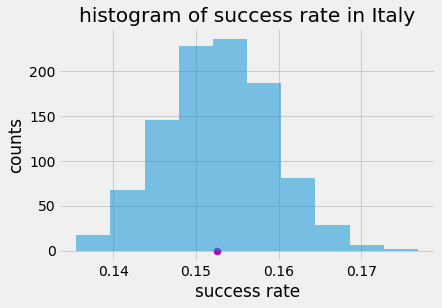

In [154]:
plt.scatter(comp3[comp3['country'] == 'IT']['success_rate'].values, 0, s = 50, color = 'm')
plt.hist(success_rates_it,alpha = 0.5)
plt.title('histogram of success rate in Italy')
plt.xlabel('success rate')
plt.ylabel('counts')

In [155]:
success_rates_jp = []
num_samples = 10000
for x in np.arange(1, num_samples): 
    indices = np.random.choice(np.arange(1, len(japan_data)), len(japan_data), replace = True)
    state = japan_data['state'].reset_index()
    state = state['state'][indices]
    success_rate = np.sum(state == "successful")/len(japan_data)
    success_rates_jp.append(success_rate)

Text(0,0.5,'counts')

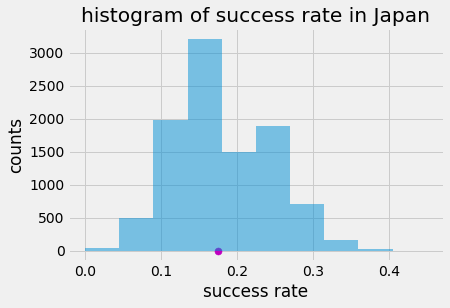

In [156]:
plt.scatter(comp3[comp3['country'] == 'JP']['success_rate'].values, 0, s = 50, color = 'm')
plt.hist(success_rates_jp,alpha = 0.5)
plt.title('histogram of success rate in Japan')
plt.xlabel('success rate')
plt.ylabel('counts')

Interpretation:
While both countries started off with quite a low success rate, After bootstrapping a couple things could be infered:
1. Italy's success rate were very concentrated within a narrow change, indicating that the low success rate are unlikely due to chance
2. Japan's success rate on the other hand were quite wide spread, indicating that the low success rate may be a product of chance
3. This also leads to an observation that it could be more likely for an event to occur by chance, if it is base of a smaller sample